<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
movies.shape

(979, 6)

In [4]:
movies.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [5]:
movies.index

RangeIndex(start=0, stop=979, step=1)

#### Check the data type of each column.

In [6]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [7]:
# Answer:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [8]:
# Answer:
movies.sort_values('duration').head()

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."


In [9]:
movies.sort_values('duration', ascending=False).head()

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

Text(0.5, 1.0, 'Duration Histogram')

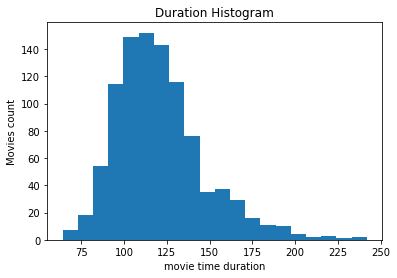

In [10]:
# Answer:
plt.hist(movies["duration"], bins=20)
plt.xlabel("movie time duration")
plt.ylabel("Movies count")
plt.title("Duration Histogram")

#### Use a box plot to display that same data.

Text(0, 0.5, 'movie time duration')

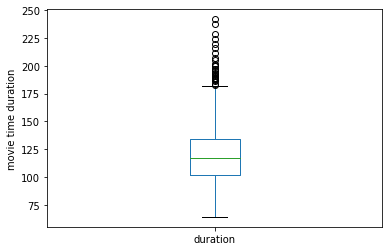

In [11]:
# Answer:
movies.duration.plot.box()
plt.ylabel("movie time duration")

## Intermediate level

#### Count how many movies have each of the content ratings.

In [12]:
# Answer:
movies["content_rating"].notnull().sum()

976

In [13]:
movies.value_counts('content_rating')

content_rating
R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5, 1.0, 'Duration Histogram')

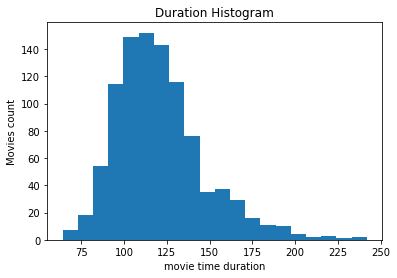

In [14]:
# Answer:
plt.hist(movies["duration"], bins=20)
plt.xlabel("movie time duration")
plt.ylabel("Movies count")
plt.title("Duration Histogram")

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [15]:
# Answer:
movies.loc[(movies['content_rating']=='NOT RATED')|(movies['content_rating']=='APPROVED')|(movies['content_rating']=='PASSED')|(movies['content_rating']=='GP'),['content_rating']]='UNRATED'

In [16]:
movies.value_counts('content_rating')

content_rating
R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [17]:
# Answer:
movies.loc[(movies['content_rating']=='X')|(movies['content_rating']=='TV-MA'),['content_rating']]='NC-17'

In [18]:
movies.value_counts('content_rating')

content_rating
R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
dtype: int64

#### Count the number of missing values in each column.

In [19]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [20]:
# Answer:
movies['content_rating'].mode()

0    R
dtype: object

In [21]:
movies.content_rating.fillna(value=movies['content_rating'].mode())

0          R
1          R
2          R
3      PG-13
4          R
       ...  
974       PG
975       PG
976    PG-13
977       PG
978        R
Name: content_rating, Length: 979, dtype: object

In [22]:
movies.content_rating.fillna(value=movies['content_rating'].mode()[0], inplace=True)

In [23]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [24]:
# Answer:
#average star rating for movies 2 hours or longer
movies.loc[movies['duration']>=120, ['star_rating']].mean()

star_rating    7.948899
dtype: float64

In [25]:
#average star rating for movies shorter than 2 hours
movies.loc[movies['duration']<120, ['star_rating']].mean()

star_rating    7.838667
dtype: float64

#### Use a visualization to detect whether there is a relationship between duration and star rating.

In [26]:
# Answer:
import seaborn as sns

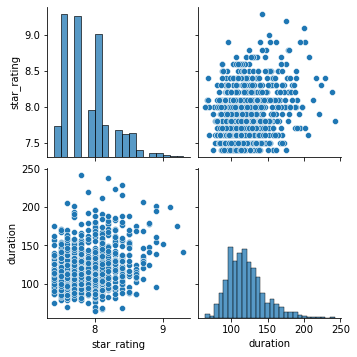

In [27]:
sns.pairplot(movies)

<AxesSubplot:>

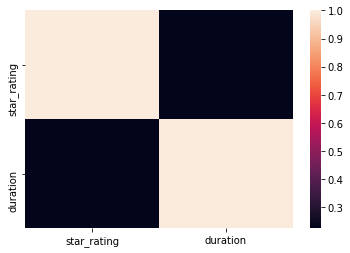

In [28]:
sns.heatmap(movies.corr())

The relationship between duration and star rating is insignificant or statistically significant.

#### Calculate the average duration for each genre.

In [29]:
# Answer:
movies.groupby('genre')['duration'].agg(['mean'])

,mean
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

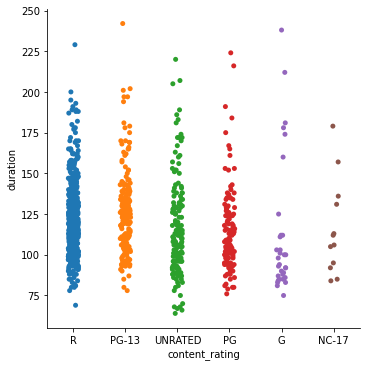

In [30]:
# Answer:
sns.catplot(x='content_rating', y='duration', data=movies)

<AxesSubplot:xlabel='content_rating', ylabel='duration'>

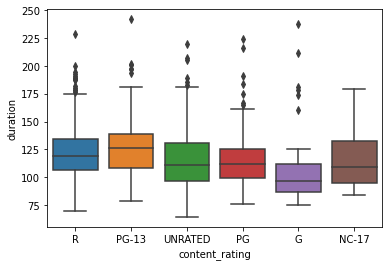

In [31]:
sns.boxplot(x='content_rating', y='duration', data=movies)

#### Determine the top rated movie (by star rating) for each genre.

In [32]:
# Answer:
movies.sort_values('star_rating', ascending=False)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
948,7.4,Frances Ha,R,Comedy,86,"[u'Greta Gerwig', u'Mickey Sumner', u'Adam Dri..."
949,7.4,Home Alone,PG,Comedy,103,"[u'Macaulay Culkin', u'Joe Pesci', u'Daniel St..."
950,7.4,Bound,R,Crime,108,"[u'Jennifer Tilly', u'Gina Gershon', u'Joe Pan..."
951,7.4,Sleepy Hollow,R,Drama,105,"[u'Johnny Depp', u'Christina Ricci', u'Miranda..."


In [33]:
movies['genre'].unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [34]:
genres_list = movies['genre'].unique()

In [35]:
#create a new dataframe for top rated movie for each genre
df_toprated = pd.DataFrame(columns = movies.columns)

In [36]:
for genre in genres_list:
    new_row=movies[movies['genre']==genre].sort_values('star_rating',ascending=False).head(1)
    df_toprated = df_toprated.append(new_row, ignore_index = False)

In [37]:
df_toprated

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
25,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
30,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
38,8.6,Rear Window,UNRATED,Mystery,112,"[u'James Stewart', u'Grace Kelly', u'Wendell C..."
39,8.6,Psycho,R,Horror,109,"[u'Anthony Perkins', u'Janet Leigh', u'Vera Mi..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [38]:
# Answer:
movies.duplicated(subset=['title']).sum()

4

In [39]:
movies.duplicated().sum()

0

They are not actually duplicates as we check the columns. It seemed only the title is duplicated.

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [40]:
movies['genre'].unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [41]:
# Answer:
chosen_list=['Crime', 'Action', 'Drama', 'Family', 'Fantasy', 'Adventure', 'Horror', 'Thriller', 'Mystery']

In [42]:
movies.loc[movies['genre'].isin(chosen_list)].groupby('genre').agg(['mean'])['star_rating']

,mean
genre,
Action,7.884559
Adventure,7.933333
Crime,7.916935
Drama,7.902518
Family,7.850000
Fantasy,7.700000
Horror,7.806897
Mystery,7.975000
Thriller,7.680000


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [43]:
# Answer:
filtered=movies['genre'].value_counts()[movies['genre'].value_counts()> 10]

In [44]:
filtered.index

Index(['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure',
       'Animation', 'Horror', 'Mystery'],
      dtype='object')

In [45]:
listed_genres = filtered.index

In [46]:
movies.loc[movies['genre'].isin(listed_genres)].groupby('genre').agg(['mean'])['star_rating']

,mean
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [47]:
# Answer:
mask=movies.groupby('genre').count()>10

In [48]:
movies.groupby('genre').mean()[mask].dropna()

,star_rating,duration
genre,,
Action,7.884559,126.485294
Adventure,7.933333,134.840000
Animation,7.914516,96.596774
Biography,7.862338,131.844156
Comedy,7.822436,107.602564
Crime,7.916935,122.298387
Drama,7.902518,126.539568
Horror,7.806897,102.517241
Mystery,7.975000,115.625000


#### Option 4: aggregate by count and mean, then filter using the count

In [49]:
# Answer:
df_agg=movies.groupby('genre').agg(['count','mean'])['star_rating']

In [50]:
df_agg[df_agg['count']>10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [51]:
movies['actors_list'].dtype

dtype('O')

In [52]:
actors = movies['actors_list'].values

In [53]:
actors.dtype

dtype('O')

In [54]:
list_actors=actors.tolist()

In [55]:
list_actors

["[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton']",
 "[u'Marlon Brando', u'Al Pacino', u'James Caan']",
 "[u'Al Pacino', u'Robert De Niro', u'Robert Duvall']",
 "[u'Christian Bale', u'Heath Ledger', u'Aaron Eckhart']",
 "[u'John Travolta', u'Uma Thurman', u'Samuel L. Jackson']",
 "[u'Henry Fonda', u'Lee J. Cobb', u'Martin Balsam']",
 "[u'Clint Eastwood', u'Eli Wallach', u'Lee Van Cleef']",
 "[u'Elijah Wood', u'Viggo Mortensen', u'Ian McKellen']",
 "[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kingsley']",
 "[u'Brad Pitt', u'Edward Norton', u'Helena Bonham Carter']",
 "[u'Elijah Wood', u'Ian McKellen', u'Orlando Bloom']",
 "[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt', u'Ellen Page']",
 "[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']",
 "[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']",
 "[u'Elijah Wood', u'Ian McKellen', u'Viggo Mortensen']",
 "[u'Matthew McConaughey', u'Anne Hathaway', u'Jessica Chastain']",
 "[u'Jack Nicholson', u'Louise Fletcher', u'Michael Berryman']",
 "[u'

In [56]:
len(list_actors)

979

In [57]:
clean_actors=list()
for i in range(len(list_actors)):
    s=list_actors[i].replace("u'","'")
    s=s.replace("'","")
    s=s.replace('u"','')
    s=s.replace('"','')
    s=s.strip("[]").split(',')
#     s=s.split(',')
    clean_actors.append(s)

In [58]:
type(clean_actors[0])

list

In [59]:
clean_actors

[['Tim Robbins', ' Morgan Freeman', ' Bob Gunton'],
 ['Marlon Brando', ' Al Pacino', ' James Caan'],
 ['Al Pacino', ' Robert De Niro', ' Robert Duvall'],
 ['Christian Bale', ' Heath Ledger', ' Aaron Eckhart'],
 ['John Travolta', ' Uma Thurman', ' Samuel L. Jackson'],
 ['Henry Fonda', ' Lee J. Cobb', ' Martin Balsam'],
 ['Clint Eastwood', ' Eli Wallach', ' Lee Van Cleef'],
 ['Elijah Wood', ' Viggo Mortensen', ' Ian McKellen'],
 ['Liam Neeson', ' Ralph Fiennes', ' Ben Kingsley'],
 ['Brad Pitt', ' Edward Norton', ' Helena Bonham Carter'],
 ['Elijah Wood', ' Ian McKellen', ' Orlando Bloom'],
 ['Leonardo DiCaprio', ' Joseph Gordon-Levitt', ' Ellen Page'],
 ['Mark Hamill', ' Harrison Ford', ' Carrie Fisher'],
 ['Tom Hanks', ' Robin Wright', ' Gary Sinise'],
 ['Elijah Wood', ' Ian McKellen', ' Viggo Mortensen'],
 ['Matthew McConaughey', ' Anne Hathaway', ' Jessica Chastain'],
 ['Jack Nicholson', ' Louise Fletcher', ' Michael Berryman'],
 ['Toshir\\xf4 Mifune', ' Takashi Shimura', ' Keiko Tsus

In [60]:
df_actors=pd.DataFrame(clean_actors)

In [61]:
df_actors.rename(columns = {0: 'actor_1', 1: 'actor_2', 2:'actor_3'}, inplace = True)

In [62]:
df_actors.head()

,actor_1,actor_2,actor_3
0,Tim Robbins,Morgan Freeman,Bob Gunton
1,Marlon Brando,Al Pacino,James Caan
2,Al Pacino,Robert De Niro,Robert Duvall
3,Christian Bale,Heath Ledger,Aaron Eckhart
4,John Travolta,Uma Thurman,Samuel L. Jackson


In [63]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Find the actor who did he the most movies in the list

In [64]:
df_actors[['actor_1', 'actor_2', 'actor_3']].apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)

Robert De Niro       13.0
Tom Hanks            12.0
Clint Eastwood       11.0
Johnny Depp          10.0
Al Pacino            10.0
                     ... 
 Kevin Zegers         1.0
 Kevin Peter Hall     1.0
 Kerry Washington     1.0
 Ken Foree            1.0
Zooey Deschanel       1.0
Length: 2010, dtype: float64

In [65]:
df_actors.values

array([['Tim Robbins', ' Morgan Freeman', ' Bob Gunton'],
       ['Marlon Brando', ' Al Pacino', ' James Caan'],
       ['Al Pacino', ' Robert De Niro', ' Robert Duvall'],
       ...,
       ['Russell Crowe', ' Paul Bettany', ' Billy Boyd'],
       ['JoBeth Williams', ' Heather ORourke', ' Craig T. Nelson'],
       ['Charlie Sheen', ' Michael Douglas', ' Tamara Tunie']],
      dtype=object)

In [66]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [68]:
movies.drop(columns='actors_list', axis=1, inplace=True)

In [70]:
movies.head()

,star_rating,title,content_rating,genre,duration
0,9.3,The Shawshank Redemption,R,Crime,142
1,9.2,The Godfather,R,Crime,175
2,9.1,The Godfather: Part II,R,Crime,200
3,9.0,The Dark Knight,PG-13,Action,152
4,8.9,Pulp Fiction,R,Crime,154


Combine the two dataframes:

In [75]:
df_movies=pd.merge(movies, df_actors, how="inner", left_index=True, right_index=True)

In [76]:
df_movies.head()

,star_rating,title,content_rating,genre,duration,actor_1,actor_2,actor_3
0,9.3,The Shawshank Redemption,R,Crime,142,Tim Robbins,Morgan Freeman,Bob Gunton
1,9.2,The Godfather,R,Crime,175,Marlon Brando,Al Pacino,James Caan
2,9.1,The Godfather: Part II,R,Crime,200,Al Pacino,Robert De Niro,Robert Duvall
3,9.0,The Dark Knight,PG-13,Action,152,Christian Bale,Heath Ledger,Aaron Eckhart
4,8.9,Pulp Fiction,R,Crime,154,John Travolta,Uma Thurman,Samuel L. Jackson


Find the average star rating for the first actors which he acted on the movies more than twice:

In [98]:
mask=df_movies.groupby('actor_1').agg(['count','mean'])['star_rating']['count']>2

In [100]:
df_movies.groupby('actor_1').agg(['count','mean'])['star_rating'][mask].sort_values('mean', ascending=False)

,count,mean
actor_1,,
Mark Hamill,3,8.633333
Henry Fonda,3,8.566667
Toshir\xf4 Mifune,3,8.500000
Charles Chaplin,5,8.480000
Aamir Khan,4,8.375000
...,...,...
John Cusack,4,7.600000
Steve Carell,5,7.580000
Nicolas Cage,4,7.575000


Find the top 5 actors who have most movies:

In [124]:
df_movies.groupby('actor_1').agg(['count','mean'])['star_rating'][mask].sort_values('count', ascending=False).head(5)

,count,mean
actor_1,,
Robert De Niro,13,7.969231
Tom Hanks,12,8.050000
Clint Eastwood,11,7.990909
Johnny Depp,10,7.750000
Al Pacino,10,8.080000


In [125]:
df_movies.groupby('actor_1').agg(['count','mean'])['star_rating'][mask].sort_values('count', ascending=False).head(5).index

Index(['Robert De Niro', 'Tom Hanks', 'Clint Eastwood', 'Johnny Depp',
       'Al Pacino'],
      dtype='object', name='actor_1')

In [126]:
list_actors=df_movies.groupby('actor_1').agg(['count','mean'])['star_rating'][mask].sort_values('count', ascending=False).head(5).index

In [127]:
list_actors

Index(['Robert De Niro', 'Tom Hanks', 'Clint Eastwood', 'Johnny Depp',
       'Al Pacino'],
      dtype='object', name='actor_1')

Find the movies where those actors acted on:

In [129]:
actors_movies=df_movies.loc[(df_movies['actor_1'].isin(list_actors))]

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Al Pacino'),
  Text(1, 0, 'Clint Eastwood'),
  Text(2, 0, 'Tom Hanks'),
  Text(3, 0, 'Robert De Niro'),
  Text(4, 0, 'Johnny Depp')])

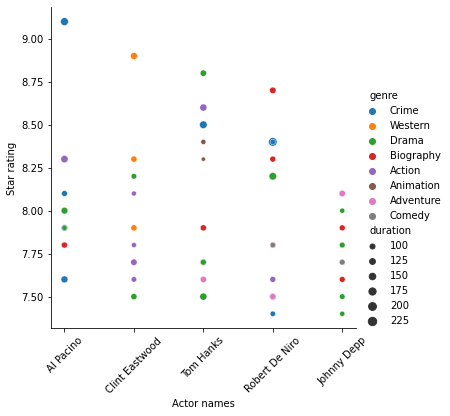

In [140]:
fig=sns.relplot(x='actor_1', y='star_rating', hue='genre', size='duration', data=actors_movies)
fig.set(xlabel='Actor names', ylabel='Star rating')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Al Pacino'),
  Text(1, 0, 'Clint Eastwood'),
  Text(2, 0, 'Tom Hanks'),
  Text(3, 0, 'Robert De Niro'),
  Text(4, 0, 'Johnny Depp')])

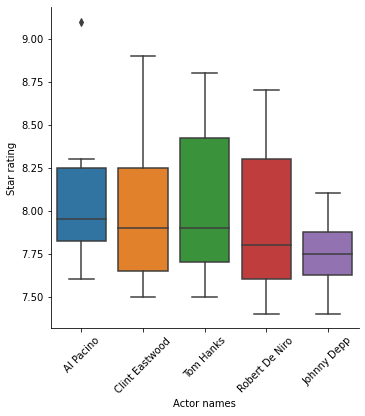

In [139]:
fig2=sns.catplot(x='actor_1', y='star_rating', kind='box', data=actors_movies)
fig2.set(xlabel='Actor names', ylabel='Star rating')
plt.xticks(rotation=45)